# Importing Libraries

In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

# Importing Sample Image File

In [2]:
image = cv2.imread("Assets/image1.jpg")

In [3]:
image[:2]

array([[[170, 188, 199],
        [160, 178, 189],
        [147, 165, 176],
        ...,
        [168, 186, 185],
        [168, 186, 185],
        [167, 185, 184]],

       [[175, 193, 204],
        [163, 181, 192],
        [150, 168, 179],
        ...,
        [168, 186, 185],
        [167, 185, 184],
        [167, 185, 184]]], dtype=uint8)

In [4]:
image.size, image.shape, image.ndim, image.dtype

(1984032, (664, 996, 3), 3, dtype('uint8'))

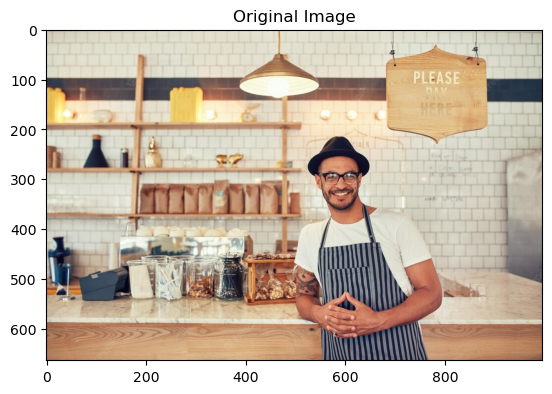

In [5]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

# OpenCV : Deep Neural Networks

## Loading the Pretrained Weights and Configuration File for YOLO Algorithm and Creating the Model

In [6]:
weights = "yolov4.weights"
config = "yolov4_config.cfg"

In [7]:
net = cv2.dnn.readNet(weights, config)
model = cv2.dnn_DetectionModel(net)
model.setInputParams(size = (320, 320), scale = 1 / 255)

# Loading COCO (Common Objects In Context) Dataset

In [8]:
class_labels = []
coco_names = "coco_names.txt"
with open(coco_names, "rt") as obj:
    class_labels = obj.read().rstrip("\n").split("\n")

In [9]:
print(class_labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [10]:
print(len(class_labels))

80


# Object Detection

In [11]:
(classIds, confidences, boundingBoxes) = model.detect(image)
for classId, confidence, boundingBox in zip(classIds, confidences, boundingBoxes):
    (x_axis, y_axis, width, height) = boundingBox
    className = class_labels[classId]
    cv2.putText(image, className, (x_axis, y_axis - 15), 
                cv2.FONT_HERSHEY_TRIPLEX, fontScale = 3,
                color = (0, 0, 21), thickness = 3)
    cv2.rectangle(image, (x_axis, y_axis), 
                  (x_axis + width, y_axis + height), 
                  color = (0, 0, 0), thickness = 3)

In [12]:
print("Class Ids : ", classIds)
print("Confidence Scores : ", confidences * 100)
print("Bounding Boxes : ", boundingBoxes)

Class Ids :  [0]
Confidence Scores :  [97.427925]
Bounding Boxes :  [[503 210 282 454]]


# Updated Image

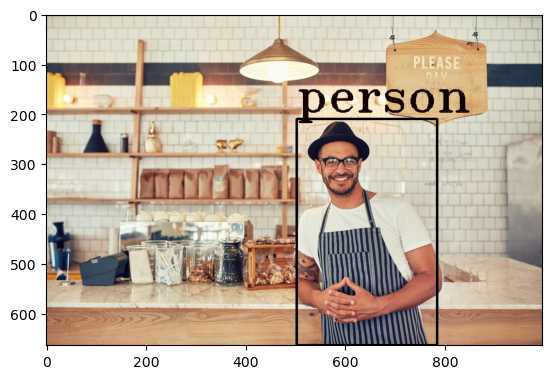

In [13]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()